<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Загрузите и изучите данные.

In [1]:
# Загрузим все необходимые библиотеки

import pandas as pd # импорт библиотеки pandas 
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
plt.style.use('seaborn-pastel')
import numpy as np # импорт библиотеки numpy

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

import time
from tqdm import tqdm # импорт библиотеки tqdm для просмотра прогресса обучения модели

In [2]:
# Загрузим данные и просмотрим таблтицу

df = pd.read_csv('/datasets/insurance.csv')

df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


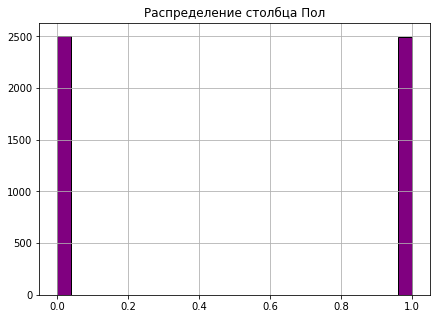

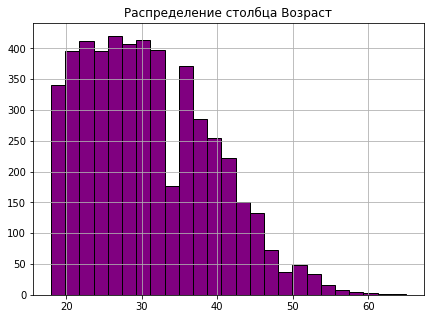

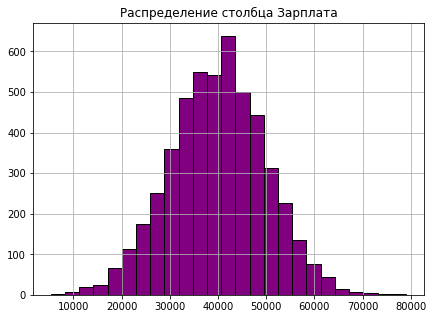

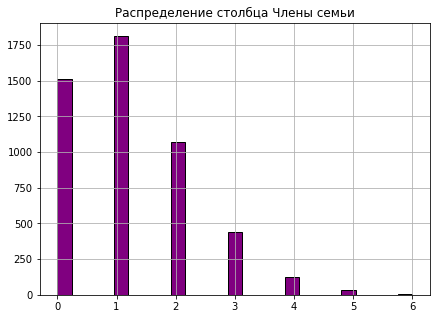

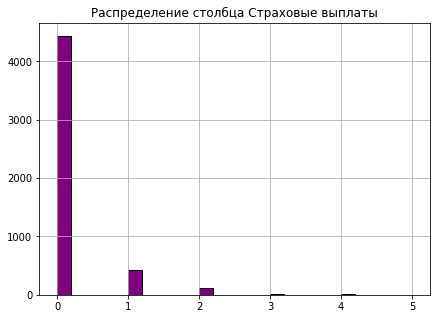

In [4]:
# Рассмотрим гистограммы столбцов

for column in df.columns:
    plt.figure(figsize=(7,5))
    df[column].hist(bins=25, edgecolor='k', color='purple')
    plt.title(f'Распределение столбца {column}')
    plt.show()

**Вывод:**

- Пропусков нет.
- Выбросов нет.
- Лишних столбцов нет.

Приступим к выполнении условий задачи.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество модели не изменится

**Обоснование:** Воспользуемся следующими свойствами матриц:
1. $AA^{-1} = E$
2. $(AB)^T = B^TA^T$
3. $(AB)^{-1} = B^{-1}A^{-1}$
4. $(AB)C = A(BC)$

Подставим в формулу обучения:
$$
w^{'} = ((XP)^TXP)^{-1}(XP)^Ty
$$

Раскроем скобки:
$$
w^{'} = (X^TP^TXP)^{-1}X^TP^Ty
$$

Заключим $X^TX$ в скобки и раскроем внешние:
$$
w^{'} = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

При перемножении $(P^T)^{-1}P^T$ выходит единичная матрица и уравнение сокращается:

$$
w^{'} = P^{-1}(X^TX)^{-1}X^Ty
$$

Подставим $w$ в $w^{'}$:
$$
w^{'} = P^{-1}w
$$

Подставим в предсказания перемноженные матрицы и посмотрим результат:
$$
a^{'} = XPw^{'}
$$

Образуется единичная матрица:
$$
a^{'} = XPP^{-1}w
$$
$$
a^{'} = Xw = a
$$

**Вывод:**

При использовании обратимой матрицы признаков, как метод шифрования - метрика не изменится, так как предсказания $a$ равны $a^{'}$.

## Алгоритм преобразования

**Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.**

**Алгоритм**

Для преобразования воспользуемся данным алгоритмом:

1. Разделим данные на признаки и целевой признак.
2. Создадим рандомизированную квадратную матрицу, ширина которой будет равняться количеству признаков.
3. Проверим матрицу на обратимость. Если необратима - зададим другие параметры рандомизации.
4. Преобразуем признаки, умножив их на матрицу и сохраним их в новой переменной - зашифрованной таблице.
5. Сохраним обратную матрицу, чтобы была возможность дешифровать признаки.
6. Разделим изначальный датасет и зашифрованный на тестовую и тренировочную выборку.
7. Проверим метрики. Если не отличаются - задача выполнена.

**Обоснование**

Так как на основании полученной ранее формулы, где предсказания $a$ равны $a^{'}$, при умножении матрицы признаков на обратимую матрицу, метрики качества не изменятся.

Проверим наш алгоритм.

## Проверка алгоритма

Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

Создадим функцию, которая выполняет необходимые операции:

In [5]:
# Создаём функцию, которая преобразовывает данные:

def encode(data, randomstate=12345, randint=1000):
    try:
        # задаём рандом
        rng = np.random.RandomState(randomstate)
        
        # создаём матрицу, где идет разброс значений от 0 до 1000
        P = rng.randint(randint, size=(data.shape[1], data.shape[1]))
        
        # проверяем обратимость. Если будет необратимая - перенесет на except
        Pinv = np.linalg.inv(P)
        
        # преобразуем таблицу и снова задаём столбцы
        encoded_data = np.dot(data, P)
        encoded_data = pd.DataFrame(encoded_data, columns=data.columns)
        
        # возвращаем ключ шифрования и преобразованную таблицу
        return encoded_data, Pinv
    except:
        print('Cannot create inverted matrix. Try another RandInt or RandomState.')

Разделим датасет на признаки и целевой признак, проверим шифрацию данных:

In [6]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

features_encoded, encode_key = encode(features)

features_encoded

,Пол,Возраст,Зарплата,Члены семьи
0,27099671.0,26851825.0,38159001.0,5867671.0
1,20767689.0,20577865.0,29240226.0,4500527.0
2,11478180.0,11373325.0,16160078.0,2488353.0
3,22777758.0,22569255.0,32076630.0,4928307.0
4,14262842.0,14132485.0,20081881.0,3089925.0
...,...,...,...,...
4995,19504698.0,19326230.0,27465304.0,4222806.0
4996,28625049.0,28363165.0,40309242.0,6195443.0
4997,18518538.0,18349030.0,26078048.0,4007550.0
4998,17865029.0,17701480.0,25156951.0,3866898.0


**Матрица преобразована.**

Создадим функцию, которая принимает в виде аргументов: `признаки`, `целевой признак` и `модель обучения`.

Внутри функции разделение матрицы на тестовую и тренировочную выборку в соотношении 4 к 1, обучает модель на выборках и показывает метрики качества модели - как на тренировочной, так и на тестовой.

In [7]:
def check_r2(features, target, model=LinearRegression()):
    
    train_features, test_features, train_target, test_target = train_test_split(features,
                                                                                target,
                                                                                test_size=0.2,
                                                                                random_state=12345)
    
    model = model
    model.fit(train_features, train_target)
    
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
    train_score = r2_score(train_target, train_predicted)
    test_score = r2_score(test_target, test_predicted)
    
    print('Метрика R2 на тренировочной выборке:', round(train_score, 4), 
          '\nМетрика R2 на тестовой выборке:', round(test_score, 4))

Проверим не преобразованный датасет:

In [8]:
check_r2(features, target)

Метрика R2 на тренировочной выборке: 0.4273 
Метрика R2 на тестовой выборке: 0.4118


Проверим шифрованный:

In [9]:
check_r2(features_encoded, target)

Метрика R2 на тренировочной выборке: 0.4273 
Метрика R2 на тестовой выборке: 0.4118


**Вывод**

Метрики качества моделей до и после преобразования не изменились.

Функцией `encode`, можно защитить данные клиентов страховой компании «Хоть потоп». При этом качество модели не будет меняться.